In [3]:
# definiciones

# funciona  a usar calculoRegresion() definida previamente, haremos la prueba para 1/plx , dist50
#funcion de aplicacion
def aplicaRegresion(x1,x2):
    x=x1
    # x=np.arange([32, 48, 72, 64, 48 ,16 ,40,48,48, 24,80, 56 ]).tolist()
    # y=np.arange([230,262,323,298,255,199,248,279,267,214,359,305]).tolist()
    y=x2
    m, deltaM = calculoRegresion(x,y)
    return m, deltaM


# no es lo mismo calcular y=mx+b  , x=my+
# insertando funciones ya creadas

def AjustePlanoCubo(dfConvecS3):
    #dfConvecS3=dfConvecS2[dfConvecS2['ZGal'].astype(float)<max]
    #dfConvecS3=dfConvecS3[dfConvecS3['ZGal'].astype(float)>min]
    npArray=dfConvecS3.to_numpy()
    a=npArray[:,49] #GR En m/s
    a=np.transpose(a)
    b=npArray[:,3]*1e3       #Distancia en pc
    b=np.transpose(b)
    e=npArray[:,10]*1e3       # Por seaca era Xgal
    #print(a)
    #print(b)
    c=[a,b]
    c=np.transpose(c)
    radialVelocity=npArray[:,28]*1e3   #dependencia con velocidad Radial m/s
    #print(c[0])
    #print(radialVelocity[0])
    print("Y = a0*x1+a1*x2+b => ajuste multilineal \n \t x1=GR x2=Distancia")
    AjustePlano(c,radialVelocity)
    return "listo"
#Se importan la librerias a utilizar
def AjustePlano(c,radialVelocity):
    from sklearn import datasets, linear_model
    #Importamos los datos de la misma librería de scikit-learn
    boston = datasets.load_boston()
    #Verifico la información contenida en el dataset
    #print('Información en el dataset:')
    #print(boston.keys())
    #Verifico las características del dataset
    #print('Características del dataset:')
    #print(boston.DESCR)
    #Verifico la cantidad de datos que hay en los dataset
    #print('Cantidad de datos:')
    #print(boston.data.shape)
    #Verifico la información de las columnas
    #print('Nombres columnas:')
    #print(boston.feature_names)
    #boston.data
    #Seleccionamos las columna 5, 6 y 7 del dataset
    #X_multiple = boston.data[:,5:9]
    X_multiple=c
    #Defino los datos correspondientes a las etiquetas
    #y_multiple = boston.target
    y_multiple=radialVelocity
    from sklearn.model_selection import train_test_split
    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.5)
    #Defino el algoritmo a utilizar
    lr_multiple = linear_model.LinearRegression()
    #Entreno el modelo
    lr_multiple.fit(X_train, y_train)
    #Realizo una predicción
    Y_pred_multiple = lr_multiple.predict(X_test)
    print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
    print()
    print('Valor de las pendientes o coeficientes "a":')
    print(lr_multiple.coef_)
    print('Valor de la intersección o coeficiente "b":')
    print(lr_multiple.intercept_)
    print('Precisión del modelo:')
    print(lr_multiple.score(X_train, y_train))
    return "listo"

# FUNCIÓN PARA PLOTEAR AJUSTE Y DEVUELVE VALORES DE M Y C
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

def Regresion(nImages,Hours): #calcula la regresión lineal de dos columnas de df y devuelve valores de m, c en y=mx+c
    #pip3 install numpy==1.16.4
#     fig = plt.figure(figsize=(14,14))
#     plt.scatter(processDf['Image Number'],processDf.index)
#     plt.plot(processDf['Image Number'],processDf.index)
#     plt.xlabel('Number of Images')
#     plt.ylabel('Computational Hours')
#     plt.grid()


    nImages = nImages.values.reshape(-1, 1)  # values converts it into a numpy array
    Hours = Hours.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(nImages, Hours)  # perform linear regression
    Hours_pred = linear_regressor.predict(nImages) # make predictions
    #equation definition y = mx +c
    #in this case Hours = m * nImages + c
    m = round(linear_regressor.coef_[0][0],4)
    c = round(linear_regressor.intercept_[0],2)
    label = "valor de m "+ m.astype(str) + " valor de c : "+ c.astype(str)
    print(label)
#     fig = plt.figure(figsize=(14,14))
#     plt.show()


#     plt.scatter(processDf['Total Size (mb)'],processDf.index)
#     plt.scatter(xyz['Image Number'],processDf.index,label='Measured Hours')
#     ##plt.plot(nImages, Hours_pred, color='royalblue',label=label)
#     plt.xlabel('Number of Images')
#     plt.ylabel('Computational Hours')
#     plt.legend(prop={'size': 16})
#     ##plt.scatter(nImages,Hours,c='g',s=0.1)

#     plt.grid()
    ## region calculo de error
    return m,c

#FUNCIÓN QUE DEVUELVE SIGMA
def sigmaReturn(m,c): # devuelve sigma
    suma=0
    for each in range(0,len(x)):
        suma+=np.power(y[each]-(m*x[each])-c,2)
    sigma=np.sqrt(suma/(len(x)-2))
    return sigma

#CALCULO DE DELTA A
def calculoDeltaA(sigma,x):
    sumaDA1=0
    sumaDA2=0
    for each in range(0,len(x)):
        sumaDA1+=len(x)*x[each]*x[each]
        sumaDA2+=x[each]
    sumaDA2=np.power(sumaDA2,2)
    deltaA=(np.sqrt(len(x))*sigma)/np.sqrt(sumaDA1-sumaDA2)
    print("valor de delta de m : "+ deltaA.astype(str))
    return deltaA

# CALCULO DE DELTA B
def calculoDeltaB(deltaA,x):
    sumaD1=0
    for each in range(0,len(x)):
        sumaD1+=(x[each]*x[each]/len(x))
    deltaB=deltaA*sumaD1
    print("valor de delta de c : "+ deltaB.astype(str))
    return deltaB

#FUNCION PRINCIPAL
def calculoRegresion(x,y):
#     x=dfSHGAIAadql['dist50']
#     y=1/dfSHGAIAadql['parallax']
    x.index=range(x.shape[0])
    y.index=range(y.shape[0])
    [m,c] = Regresion(x,y);
    sigma = sigmaReturn(m,c)
    deltaA = calculoDeltaA(sigma,x)
    deltaB = calculoDeltaB(deltaA,x)
    return m,deltaA

#Generar Diagrama HR con dos columnas de pd
def DiagramaHr(x,y):
    import matplotlib.pyplot as plot
    plt.figure(figsize=(14,14))
    plt.scatter(x,y, s=1)
    plt.colorbar()
    plt.gca().invert_yaxis()
    #plt.gca().invert_xaxis()
    plt.xlabel("BP-RP0")
    plt.ylabel("Mag G")
    return "listo"

#Histograma
def Histograma(y,nombre):
    import matplotlib.pyplot as plot
    plt.figure(figsize=(14,14))
    edades = y
    plot.hist(x=edades, bins=100, density=1,color='#F2AB6D', rwidth=2)
    plot.title('Histograma de Vel radial')
    plot.xlabel('Vel Rad')
    plot.ylabel('Frecuencia')
    plot.grid(True)
    plot.savefig("Histograma"+str(nombre)+".png")
    plot.show()

    #return "listo"

def ScatterDensityplot(x,y):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    plt.figure(figsize=(13,13))
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=1)
    plt.xlabel("GR m/s")
    plt.ylabel("CS m/s")
    plt.title("GR vs CS")
    plt.show()

def scatterplotxygaia(x,y):
    plt.scatter(x,y,s=0.0001)
    plt.xlabel("XGal")
    plt.ylabel("YGal")
    plt.title("XGal vs YGal ")
    return "listo"
def vradMvtan(x):
    plt.scatter(x['dist50'],(abs(x['radial_velocity'])-x['VtanMag']),s=0.01  )
    plt.xlabel("Distancia km")
    plt.ylabel("|V_rad|-|V_tan|")
    plt.title("|V_rad|-|V_tan| vs Distancia")
    return "listo"

def bprpMg0Mass(x):
    plt.figure(figsize=(12,9))
    plt.scatter(x['bp_rp'],x['MG0'],c=x['mass50'],vmin=0,vmax=4,s=0.001)
    plt.gca().invert_yaxis()
    #plt.gca().invert_xaxis()
    plt.xlabel("BPRP")
    plt.ylabel("Mag G")
    plt.title("Diagrama HR")
    plt.colorbar()
    plt.savefig("bprpHR.png")
    return "listo"

def filtroCS(df4):
    dfConvecS=df4[df4['teff50'].astype(float)>=3790]
    dfConvecS=dfConvecS[dfConvecS['teff50'].astype(float)<=6730]
    dfConvecS=dfConvecS[dfConvecS['logg50'].astype(float)<=4.5]
    dfConvecS=dfConvecS[dfConvecS['met50'].astype(float)>= -3]
    dfConvecS=dfConvecS[dfConvecS['met50'].astype(float)<= 0]
    dfConvecS['CoeficienteCS']=dfConvecS['logg50']-((dfConvecS['teff50']*9.184e-4)-2.482)
    # dfConvecS=dfConvecS[dfConvecS['logg50'].astype(float)<0]
    dfConvecS=dfConvecS[dfConvecS['CoeficienteCS'].astype(float)>=0]
    dfConvecS.index=range(dfConvecS.shape[0])
    return dfConvecS

def scatterxyRadio(df5):
    df5=df5[df5['ZGal'].astype(float)>-0.01]
    df5=df5[df5['ZGal'].astype(float)<0.01]
    plt.scatter(df5['XGal'],df5['YGal'],s=0.01,c=df5['radius_val'],vmin=0,vmax=10,cmap="RdBu")
    plt.xlabel("XGal")
    plt.ylabel("YGal")
    plt.colorbar()
    return

In [4]:
# librerias
import numpy as np
import pandas as pd
from scipy import spatial
from sklearn.neighbors import NearestNeighbors

In [5]:
#calculo de GR
df4= pd.read_csv("./AnalisisDR3.csv")
pd.set_option('display.max_columns', None)
pmRA=df4['pmRA']/1000; #convirtiendo el mili a arcsec
pmDEC=df4['pmDE']/1000;
pmRA=pmRA*np.pi/180
pmDEC=pmDEC*np.pi/180
pmRA=pmRA*1/31540000.001011200249
pmDEC=pmDEC*1/31540000.001011200249
df4['pmRARadSec']=pmRA
df4['pmDECRadSec']=pmDEC
VtaRA=df4['dist50']*df4['pmRARadSec']
VtaDEC=df4['dist50']*df4['pmDECRadSec']
Vmag= np.sqrt(np.power(VtaRA,2)+np.power(VtaDEC,2))
VmagR2=Vmag/np.square(2)
pmRArs=df4['pmRA']*(4.8481368E-9)/(3.154e+7) # mas/year a rad/s
distPC=df4['dist50']*30856778200000 # pc*30856778200000 km
VtanRA=pmRArs*distPC # aproximo Vtan = omega ( rad/s) * dist
pmDECrs=df4['pmDE']*(4.8481368E-9)/(3.154e+7) # mas/year a rad/s
VtanDEC=pmDECrs*distPC
VmagRADEC= np.sqrt(np.power(VtanRA,2)+np.power(VtanDEC,2))
df4['VtanMag']=VmagRADEC/np.sqrt(2)
df4['Dist50PC']=distPC
df4PorPartes=df4
df4['gravedadMs2']=np.power(10,df4['logg50'])/100# ahora esta en metros por segundo 2
df4['mass50enKg']=df4['mass50']*1.989e30
df4['MPartidoR']=np.sqrt( (df4['gravedadMs2']*df4['mass50enKg'])/6.674e-11) #
## GR CALCULADO
grsolMr=np.sqrt((274.027*1.989e30)/6.674e-11)
df4['GravitationalRedshift']=((df4['MPartidoR'])/grsolMr)*627

In [7]:
grsolMr

2.8577285160598005e+21

12056979  Elementos
Muestra original  12056979  Muestra filtrada :  1896256
Muestra original  12056979  Muestra filtrada para Distancia menor q 2:  1863662
valor de m 0.1437 valor de c : -0.22
valor de delta de m : 0.1384120826100465
valor de delta de c : 0.01936390317281354
Longitud de data:  450068
 Primer valor de GR 0.25948793213991544 Primer valor de DeltaRV 50.660000000000004
**************************
Intervalo : 0.0 pc  Hasta  0.1 pc
valor de m 2.8723 valor de c : -1.73
valor de delta de m : 1.4359102188493742
valor de delta de c : 0.5362211313456609
Longitud de data:  23449
 Primer valor de GR 0.4703486326596068 Primer valor de DeltaRV 8.455000000000002
**************************
**************************
Intervalo : 0.1 pc  Hasta  0.2 pc
valor de m -0.5682 valor de c : 0.2
valor de delta de m : 0.5726634259108008
valor de delta de c : 0.17975941413997976
Longitud de data:  70011
 Primer valor de GR 0.6353093508366121 Primer valor de DeltaRV 13.405000000000001
***************

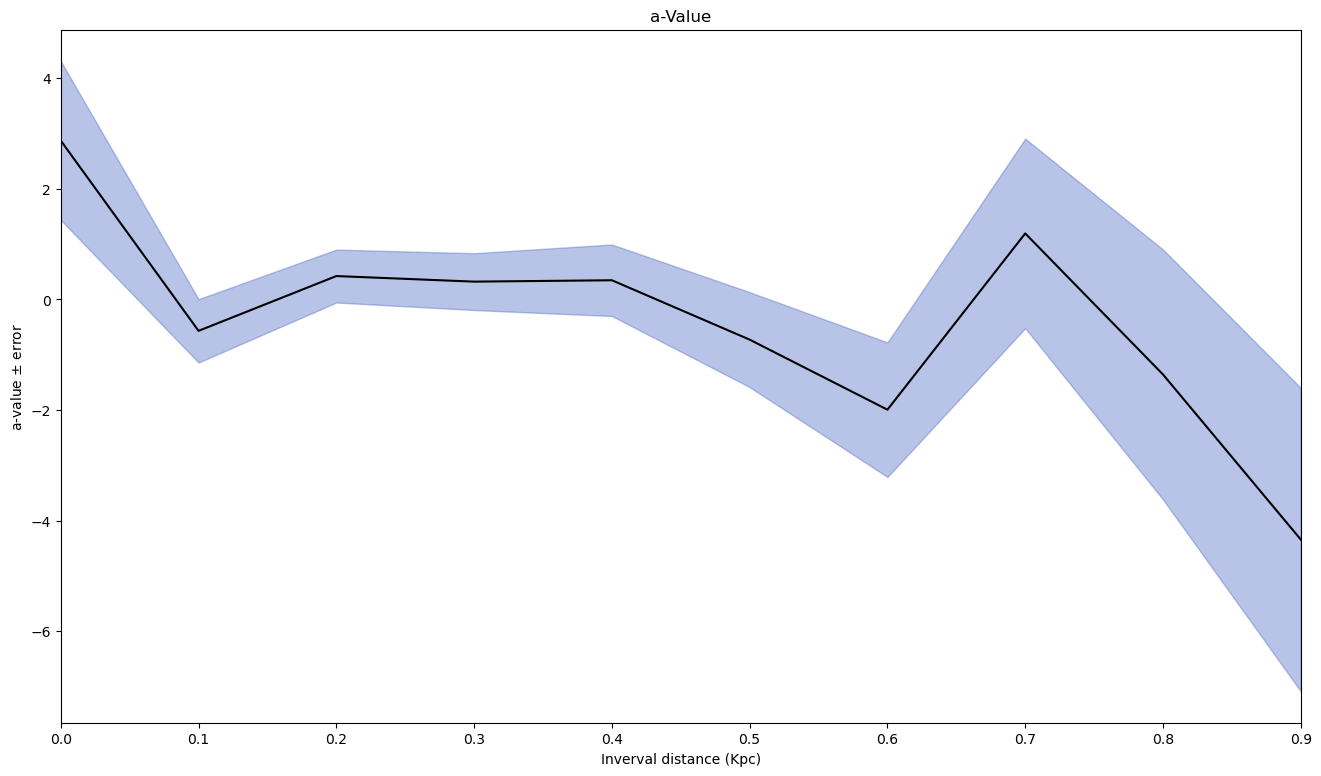

In [6]:
#algoritmo para calcular distancias mas proximas KDTREE
xyz=df4
xyz['ra']=xyz['RA_ICRS']
xyz['dec']=xyz['DE_ICRS']
xyz['radial_velocity']=xyz['RV']
xyz['source_id']=xyz['Source']
xyz['radial_velocity_error']=xyz['e_RV']
data = [xyz['XGal']*1e3, xyz['YGal']*1e3, xyz['ZGal']*1e3]
headers = ["X", "Y","Z"]
dfXYZ = pd.concat(data, axis=1, keys=headers)
# creando lista para el KDTREE
lista=dfXYZ.to_numpy().tolist()
tree = spatial.KDTree(lista)
tree.data
X2=dfXYZ.to_numpy()
nn2= NearestNeighbors(n_neighbors=2,algorithm='kd_tree')
nn2.fit(X2)
dist2,ind2 = nn2.kneighbors(X2,2)
NNdistances=dist2[:,1]
NNdistances=NNdistances.transpose()
dfXYZ["NNdistance"]=NNdistances
indexNNdistance=ind2[:,1]
indexNNdistance=indexNNdistance.transpose()
dfXYZ["indexNNdistance"]=indexNNdistance
## guardando en xyz q es df4
xyz["NNdistance"]=NNdistances
xyz["indexNNdistance"]=indexNNdistance
#creando la columna con rv de los indices en indexNNdistance
indexs=xyz['indexNNdistance'].to_numpy()
npRVindex=xyz['RV'].iloc[indexs].to_numpy()
xyz['radial_velocityKDTREnn']=npRVindex
#Paralasegunda Estrella
indexs=xyz['indexNNdistance'].to_numpy()
raS2=xyz['ra'].iloc[indexs].to_numpy()
xyz['ra_2']=raS2
#dec
indexs=xyz['indexNNdistance'].to_numpy()
decS2=xyz['dec'].iloc[indexs].to_numpy()
xyz['de_2']=decS2
#dist50
indexs=xyz['indexNNdistance'].to_numpy()
dist50S2=xyz['dist50'].iloc[indexs].to_numpy()
xyz['dist50_2']=dist50S2
#XGAL
indexs=xyz['indexNNdistance'].to_numpy()
XGAL=xyz['XGal'].iloc[indexs].to_numpy()
xyz['XGAL_2']=XGAL
#YGAL
indexs=xyz['indexNNdistance'].to_numpy()
YGAL=xyz['YGal'].iloc[indexs].to_numpy()
xyz['YGal_2']=YGAL
#ZGAL
indexs=xyz['indexNNdistance'].to_numpy()
ZGAL=xyz['ZGal'].iloc[indexs].to_numpy()
xyz['ZGal_2']=YGAL
#GR
indexs=xyz['indexNNdistance'].to_numpy()
GR=xyz['GravitationalRedshift'].iloc[indexs].to_numpy()
xyz['GravitationalRedshift_2']=GR
#Vrad
indexs=xyz['indexNNdistance'].to_numpy()
vrad=xyz['radial_velocity'].iloc[indexs].to_numpy()
xyz['radial_velocity_2']=vrad
#Vrad_error
indexs=xyz['indexNNdistance'].to_numpy()
vradError =xyz['radial_velocity_error'].iloc[indexs].to_numpy()
xyz['radial_velocity_error2']=vradError
xyz['deltaRV']=xyz['radial_velocity']-((xyz['radial_velocity']+xyz['radial_velocityKDTREnn'])/2)
# xyz.to_csv("resultadoGaiaSH2021.csv",index=False)
print(len(xyz), " Elementos")
source =xyz['source_id'].iloc[indexs].to_numpy()
xyz['source_id_2']=source
xyz['id_source_id']=xyz['source_id']+xyz['source_id_2']+10000000000000000
xyzDrop=xyz.drop_duplicates(subset=['id_source_id'])
# ELIMINANDO DUPLICADOS
xyzSort=xyzDrop.sort_values(by=['indexNNdistance','NNdistance'])
xyzSortDrop=xyzDrop.drop_duplicates(subset=['indexNNdistance'],keep='first')
xyzDrop = xyzSortDrop
xyzDrop2=xyzDrop[xyzDrop['radial_velocity'].astype(float)<100]
xyzDrop2=xyzDrop2[xyzDrop2['radial_velocity'].astype(float)>-100]
xyzDrop2=xyzDrop2[xyzDrop2['radial_velocity_error'].astype(float)<2]
xyzDrop2=xyzDrop2[xyzDrop2['NNdistance'].astype(float)<25]
print("Muestra original ",len(df4['ra'])," Muestra filtrada : ", len(xyzDrop2['ra']))
xyz=xyzDrop2
xyz2=xyz[xyz['dist50'].astype(float)<1]
xyz2=xyz2[xyz2['dist50'].astype(float)>0]
xyz2=xyz2[xyz2['NNdistance']<8]
print("Muestra original ",len(df4['ra'])," Muestra filtrada para Distancia menor q 2: ", len(xyz2['ra']))
## solo para esto : filtros en Vrad <+- 120
# filtro en error_vrad <2
xyz2=xyz2[xyz2['radial_velocity'].astype(float)<100] #//******************************************************************************************************************************************************************************************************************
xyz2=xyz2[xyz2['radial_velocity'].astype(float)>-100] #//******************************************************************************************************************************************************************************************************************
xyz2=xyz2[xyz2['radial_velocity_error'].astype(float)<0.5]  #//******************************************************************************************************************************************************************************************************************
#criba en velocidad radial
for each in range(1,10):
    xyz2=xyz2[xyz2['radial_velocity'].astype(float)<np.mean(xyz2['radial_velocity'])+3*np.std(xyz2['radial_velocity'])]
    xyz2=xyz2[xyz2['radial_velocity'].astype(float)>np.mean(xyz2['radial_velocity'])-3*np.std(xyz2['radial_velocity'])]
x=xyz2['GravitationalRedshift']*1e-3
y=xyz2['deltaRV']
m, deltaM = aplicaRegresion(x,y)
print("Longitud de data: ", len(xyz2['GravitationalRedshift']))
print(" Primer valor de GR",x[0],"Primer valor de DeltaRV",y[0])
plotMValue=[]
plotDeltaMValue=[]
elementos = []
for each in range(0,10):
    a=each/10
    xyz2=xyz[xyz['dist50'].astype(float)<a+0.1]
    xyz2=xyz2[xyz2['dist50'].astype(float)>a]
    xyz2=xyz2[xyz2['NNdistance']<10]
    #criba y filtros
#     xyz2=xyz2[xyz2['radial_velocity'].astype(float)<100]
#     xyz2=xyz2[xyz2['radial_velocity'].astype(float)>-100]
    xyz2=xyz2[xyz2['radial_velocity_error'].astype(float)<0.5]
    #criba en velocidad radial
    for each in range(1,10):
        xyz2=xyz2[xyz2['radial_velocity'].astype(float)<np.mean(xyz2['radial_velocity'])+3*np.std(xyz2['radial_velocity'])]
        xyz2=xyz2[xyz2['radial_velocity'].astype(float)>np.mean(xyz2['radial_velocity'])-3*np.std(xyz2['radial_velocity'])]
    x=xyz2['GravitationalRedshift']*1e-3
    y=xyz2['deltaRV']
    elementoEach = len(xyz2['GravitationalRedshift'])
    print("**************************")
    print("Intervalo :",a,"pc"," Hasta ",a+0.1, "pc")
    m, deltaM =aplicaRegresion(x,y)
    plotMValue.append(m)
    plotDeltaMValue.append(deltaM)
    elementos.append(elementoEach)
    print("Longitud de data: ", len(xyz2['GravitationalRedshift']))
    print(" Primer valor de GR",x[0],"Primer valor de DeltaRV",y[0])
    print("**************************")
rango = np.arange(0,10)
dfPlot= pd.DataFrame()
dfPlot['rango']= rango/10
dfPlot['m-value']=plotMValue
dfPlot['delta-m']=plotDeltaMValue
dfPlot['N-elementos']=elementos
plt.figure(figsize=(16,9))
plt.title("a-Value")
plt.plot(dfPlot['rango'],dfPlot['m-value'],c='black',label="a-value Interval")
plt.fill_between(dfPlot['rango'], dfPlot['m-value']-dfPlot['delta-m'], dfPlot['m-value']+dfPlot['delta-m'],alpha=0.4,color="#4F69C6")
plt.xlim(0,0.9)
plt.xlabel("Inverval distance (Kpc)")
plt.ylabel("a-value $\pm$ error")
# plt.savefig("C:\\Users\\miguel\\Documents\\A-VALUE")
plt.show()


In [9]:
df4

,RA_ICRS,DE_ICRS,Source,dist50,teff50,logg50,met50,mass50,BP-RP0,GMAG0,XGal,YGal,ZGal,RGal,Source.1,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,e_FG,RV,e_RV,Teff,pmRARadSec,pmDECRadSec,VtanMag,Dist50PC,gravedadMs2,mass50enKg,MPartidoR,GravitationalRedshift,ra,dec,radial_velocity,source_id,radial_velocity_error,NNdistance,indexNNdistance,radial_velocityKDTREnn,ra_2,de_2,dist50_2,XGAL_2,YGal_2,ZGal_2,GravitationalRedshift_2,radial_velocity_2,radial_velocity_error2,deltaRV,source_id_2,id_source_id
0,45.487090,0.910046,163689793862144,0.801245,5990.00,4.013000,-0.054052,1.060000,0.715910,3.363706,-8.735964,0.032900,-0.594688,8.736026,163689793862144,1.2210,0.0153,3.589,0.016,-3.713,0.014670,13.110829,20.771685,-8.12,3.14,6042.7,1.986045e-12,-2.054663e-12,0.013877,2.472384e+13,103.038612,2.108340e+30,1.804169e+21,395.843753,45.487090,0.910046,-8.12,163689793862144,3.14,5.399468,3107331,51.83,45.473035,0.621762,0.804822,-8.736320,0.030155,0.030155,593.393978,51.83,5.84,-29.975,49413599559424,10213103393421568
1,44.962287,1.704122,456404700393728,0.363050,5464.84,4.574432,-0.453468,0.771220,0.902953,5.589491,-8.443292,0.020869,-0.268661,8.443317,456404700393728,2.7068,0.0160,-13.293,0.017,-8.221,0.015979,13.567449,15.416214,-37.53,3.17,NaN,-7.355949e-12,-4.549255e-12,0.019031,1.120255e+13,375.346180,1.533957e+30,2.937172e+21,644.430378,44.962287,1.704122,-37.53,456404700393728,3.17,1.274719,8194501,15.58,44.879912,1.887032,0.362940,-8.443452,0.022072,0.022072,436.450385,15.58,0.68,-26.555,508975100054016,10965379800447744
2,45.450010,1.967578,487672062287104,0.234748,4668.74,4.614960,0.179297,0.750000,1.277599,6.508519,-8.358963,0.012972,-0.172248,8.358973,487672062287104,4.2264,0.0144,69.348,0.017,-20.737,0.014517,13.526240,11.930176,27.15,2.30,4625.6,3.837511e-11,-1.147524e-11,0.056988,7.243567e+12,412.059565,1.491750e+30,3.034834e+21,665.857804,45.450010,1.967578,27.15,487672062287104,2.30,3.062524,1883919,-38.14,45.276824,2.149029,0.231862,-8.356943,0.013825,0.013825,625.527740,-38.14,4.82,32.645,540856642027008,11028528704314112
3,46.342417,1.304049,567524094320384,0.441211,6132.91,4.394875,-0.223654,0.999970,0.691452,4.342078,-8.500303,0.016006,-0.322845,8.500319,567524094320384,2.2155,0.0187,-1.361,0.019,-17.286,0.017294,12.883227,39.519707,-8.91,2.11,5840.2,-7.531367e-13,-9.565555e-12,0.025659,1.361435e+13,248.241850,1.988940e+30,2.719915e+21,596.762945,46.342417,1.304049,-8.91,567524094320384,2.11,4.030143,7629128,-0.01,46.265566,1.780862,0.439643,-8.500608,0.019071,0.019071,541.635107,-0.01,0.90,-4.450,645516404728064,11213040499048448
4,46.360134,2.381331,891257253530752,0.284420,5963.94,4.450386,-0.459762,0.884554,0.730876,4.673463,-8.396106,0.014249,-0.205509,8.396118,891257253530752,3.4764,0.0154,4.634,0.016,-20.332,0.015860,12.061583,75.841870,5.99,1.25,5692.7,2.564317e-12,-1.125112e-11,0.019892,8.776285e+12,282.088902,1.759378e+30,2.726964e+21,598.309692,46.360134,2.381331,5.99,891257253530752,1.25,3.347540,8382366,40.20,46.031377,2.875169,0.282811,-8.395184,0.017062,0.017062,652.120032,40.20,7.79,-17.105,1062510485191808,11953767738722560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056974,314.571483,-1.516905,6917258994458058624,0.693359,5503.66,4.542263,-0.352494,0.796418,0.905720,5.426861,-7.786545,0.446277,-0.332625,7.799323,6917258994458058624,1.3985,0.0261,-2.480,0.026,3.323,0.019983,14.829349,4.878572,23.34,7.29,5329.7,-1.372358e-12,1.838849e-12,0.009642,2.139482e+13,348.548325,1.584075e+30,2.876248e+21,631.063259,314.571483,-1.516905,23.34,6917258994458058624,7.29,3.284933,8946989,59.32,314.797755,-1.665646,0.693600,-7.787348,0.445160,0.445160,576.938581,59.32,1.90,-17.990,6917053871115675392,-4602431208135817600
12056975,314.532344,-1.221901,6917302910499276544,0.475211,5412.95,4.504924,-0.058121,0.859376,0.918609,5.288571,-7.917566,0.3077

In [8]:
pip install qrcode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import qrcode

def generate_qr_code(url, file_name):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4
    )
    qr.add_data(url)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(file_name)

# Ejemplo de uso
url = "https://github.com/mapsm12/GaiaRedshift"  # URL que deseas codificar en el QR
file_name = "codigo_qr.png"  # Nombre del archivo de imagen del código QR

generate_qr_code(url, file_name)
